# Cleaning University of Central Florida's Power Consumption Dataset
The data retrieved from [UCF's energy dashboard](http://oeis.ucf.edu/buildings/85) regarding power consumption in UCF's Engineering (Harris Corporation Engineering Center) building is in the form of a json format. Here we'll be converting it into a csv file for later data analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import pprint
from datetime import datetime

In [2]:
#Helper functions

#Conversion from kBTU (Current unit) to kWH (Metric System)
def convert_kwh(kbtu_unit):
    return kbtu_unit * 0.29307106944 

#Conversion of dates into datetime objects
def convert_dates(dates):
    return [datetime.strptime(d,"%Y-%m-%d").date() for d in dates]

#Get day of week based on date
def get_weekday(dates):
    return [datetime.strptime(d,"%Y-%m-%d").weekday() for d in dates]

In [3]:
with open('Datasets/UCF_PowerConsumption.json') as json_file:
    data = json.load(json_file)[0]
    
pprint.pprint(data)

{'key': 'Electric',
 'values': [{'reading': 15802.633929208, 'timestamp': '2019-01-01'},
            {'reading': 28332.391676481, 'timestamp': '2019-01-02'},
            {'reading': 26559.782773344, 'timestamp': '2019-01-03'},
            {'reading': 26285.734826599, 'timestamp': '2019-01-04'},
            {'reading': 27307.186213573, 'timestamp': '2019-01-05'},
            {'reading': 30126.842329202, 'timestamp': '2019-01-06'},
            {'reading': 28304.748071398, 'timestamp': '2019-01-07'},
            {'reading': 27630.719736305, 'timestamp': '2019-01-08'},
            {'reading': 29287.293300017, 'timestamp': '2019-01-09'},
            {'reading': 32727.73807278, 'timestamp': '2019-01-10'},
            {'reading': 32279.637286142, 'timestamp': '2019-01-11'},
            {'reading': 27837.535526045, 'timestamp': '2019-01-12'},
            {'reading': 27636.86276255, 'timestamp': '2019-01-13'},
            {'reading': 29105.049836577, 'timestamp': '2019-01-14'},
            {'re

In [4]:
#Create new dataframe to store data
df_power = pd.DataFrame(columns = ['Power', 'Date'])
df_power.head()

,Power,Date


In [5]:
readings = data['values']

for entry in readings:
    #Get corresponding values
    date = entry['timestamp']
    power = convert_kwh(float(entry['reading']))
    
    #Add to dataframe
    df_power = df_power.append({"Power": power, "Date": date}, ignore_index=True)
    
df_power['Weekday'] = get_weekday(df_power['Date'])
df_power.head()

,Power,Date,Weekday
0,4631.294826,2019-01-01,1
1,8303.404328,2019-01-02,2
2,7783.903941,2019-01-03,3
3,7703.588417,2019-01-04,4
4,8002.946267,2019-01-05,5


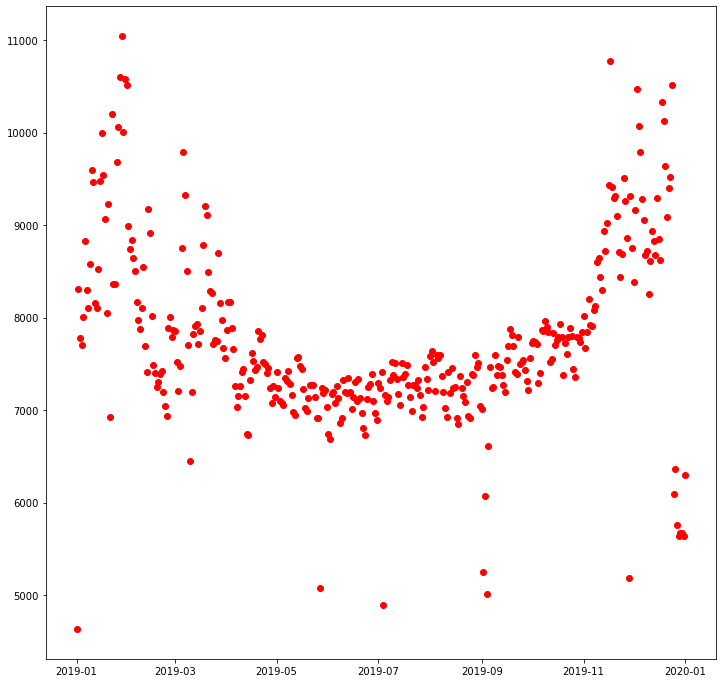

In [6]:
#Plotting data for exploratory analysis
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

#Select subset of data by altering variables. Choose entire scale by 1, 0
num_split = 1
num_piece = 0
df = np.split(df_power, num_split)[num_piece]

plt.figure(figsize=(12,12))
#Change y-range
#Convert timestamps into correct date format for matplotlib
dates = date2num(convert_dates(df['Date']))
#Plot points
plt.plot_date(dates, df['Power'], color='Red')
plt.show()

In [7]:
#Place dataset in .csv file
df_power.to_csv('Datasets/UCF_PowerConsumption.csv', index=False)

# Merging with Weather Data

In [8]:
df_weather = pd.read_csv('Datasets/Orlando_Weather.csv', skiprows=2)
df_power = pd.read_csv('Datasets/UCF_PowerConsumption.csv')

In [9]:
df_weather.describe()

,Year,Month,Day,Hour,Minute,DNI,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
count,8760.0,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2019.0,6.526027,15.720548,11.500000,30.0,212.610502,2.381655,3.371530,156.567237,79.879249,22.978231,1013.252854
std,0.0,3.448048,8.796749,6.922582,0.0,307.664678,1.335246,1.369102,95.538732,18.367842,6.061929,3.636009
min,2019.0,1.000000,1.000000,0.000000,30.0,0.000000,0.100000,0.300000,1.000000,24.730000,2.000000,999.000000
25%,2019.0,4.000000,8.000000,5.750000,30.0,0.000000,1.300000,2.300000,78.000000,66.857500,19.300000,1011.000000
50%,2019.0,7.000000,16.000000,11.500000,30.0,0.000000,2.100000,3.400000,139.000000,84.045000,23.900000,1013.000000
75%,2019.0,10.000000,23.000000,17.250000,30.0,411.000000,3.200000,4.500000,232.000000,96.530000,27.200000,1016.000000
max,2019.0,12.000000,31.000000,23.000000,30.0,1032.000000,9.000000,6.600000,359.000000,100.000000,37.600000,1026.000000


In [10]:
df_power.describe()

,Power,Weekday
count,366.000000,366.000000
mean,7756.492914,2.991803
std,973.217951,2.000668
min,4631.294826,0.000000
25%,7214.718963,1.000000
50%,7516.702317,3.000000
75%,8149.799640,5.000000
max,11042.133471,6.000000


In [11]:
df_weather = df_weather.drop(columns=['Hour', 'Minute'])
df_weather = df_weather[df_weather.DNI != 0]
df_weather.head(10)

,Year,Month,Day,DNI,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
12,2019,1,1,135,1.2,2.2,192,96.67,18.8,1018
13,2019,1,1,611,1.6,2.2,187,88.63,21.5,1018
14,2019,1,1,778,1.9,2.3,187,79.87,24.0,1019
15,2019,1,1,849,2.1,2.4,190,70.99,25.7,1018
16,2019,1,1,686,2.0,2.4,193,65.73,26.6,1017
17,2019,1,1,580,1.9,2.5,199,63.15,27.2,1016
18,2019,1,1,707,1.6,2.6,207,61.77,27.5,1016
19,2019,1,1,762,1.3,2.6,213,61.11,27.5,1016
20,2019,1,1,627,0.9,2.6,212,61.88,27.1,1016
21,2019,1,1,500,0.5,2.6,166,65.52,26.2,1016


In [12]:
#Take mean, max and min for each DNI in DataFrame and mean for everything else
max_dni = df_weather.groupby(['Year', 'Month', 'Day']).max().reset_index()['DNI']
min_dni = df_weather.groupby(['Year', 'Month', 'Day']).min().reset_index()['DNI']
df_weather = pd.DataFrame(df_weather.groupby(['Year', 'Month', 'Day']).mean().reset_index())
df_weather.insert(4, 'DNI Max', max_dni)
df_weather.insert(5, 'DNI Min', min_dni)
df_weather.head()

,Year,Month,Day,DNI,DNI Max,DNI Min,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2019,1,1,576.363636,849,105,1.409091,2.445455,186.636364,71.561818,25.145455,1017.000000
1,2019,1,2,349.636364,848,12,1.372727,2.354545,119.818182,70.552727,24.727273,1017.090909
2,2019,1,3,262.818182,667,53,2.154545,2.836364,225.000000,73.302727,25.381818,1014.000000
3,2019,1,4,316.000000,888,3,4.809091,3.118182,206.636364,72.369091,25.300000,1010.272727
4,2019,1,5,547.636364,932,6,4.154545,1.418182,291.272727,68.391818,17.927273,1013.000000


In [13]:
df_weather.describe()

,Year,Month,Day,DNI,DNI Max,DNI Min,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
count,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019.0,6.526027,15.720548,424.060436,734.808219,45.394521,2.920959,3.385210,156.673065,68.021871,25.618555,1013.270722
std,0.0,3.452584,8.808321,206.135461,229.657871,67.141052,1.230575,1.350317,83.845855,12.014856,4.714814,3.510141
min,2019.0,1.000000,1.000000,3.500000,5.000000,1.000000,0.791667,0.458333,15.000000,33.872308,10.877778,1003.166667
25%,2019.0,4.000000,8.000000,272.083333,672.000000,3.000000,2.045455,2.400000,84.545455,60.214615,22.888889,1010.800000
50%,2019.0,7.000000,16.000000,442.384615,826.000000,14.000000,2.740000,3.400000,140.076923,67.852727,27.200000,1013.100000
75%,2019.0,10.000000,23.000000,597.666667,886.000000,58.000000,3.575000,4.500000,234.500000,77.295455,29.150000,1015.500000
max,2019.0,12.000000,31.000000,832.083333,1032.000000,303.000000,7.200000,6.022222,329.250000,97.390000,33.061538,1024.272727


In [14]:
df_power[['Year', 'Month', 'Day']] = df.Date.str.split('-', expand=True).apply(pd.to_numeric)
df_power.head()

,Power,Date,Weekday,Year,Month,Day
0,4631.294826,2019-01-01,1,2019,1,1
1,8303.404328,2019-01-02,2,2019,1,2
2,7783.903941,2019-01-03,3,2019,1,3
3,7703.588417,2019-01-04,4,2019,1,4
4,8002.946267,2019-01-05,5,2019,1,5


In [15]:
df_merge = df_weather.merge(df_power[['Power', 'Month', 'Day', 'Weekday']], left_on=('Month', 'Day'), right_on=('Month', 'Day'), how = 'inner', suffixes=('_left','_right'))
df_merge = df_merge.rename(columns={'Power': 'Power Consumption', 'DNI':'DNI Mean'})
df_merge.head()

,Year,Month,Day,DNI Mean,DNI Max,DNI Min,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Power Consumption,Weekday
0,2019,1,1,576.363636,849,105,1.409091,2.445455,186.636364,71.561818,25.145455,1017.000000,4631.294826,1
1,2019,1,1,576.363636,849,105,1.409091,2.445455,186.636364,71.561818,25.145455,1017.000000,6301.517531,2
2,2019,1,2,349.636364,848,12,1.372727,2.354545,119.818182,70.552727,24.727273,1017.090909,8303.404328,2
3,2019,1,3,262.818182,667,53,2.154545,2.836364,225.000000,73.302727,25.381818,1014.000000,7783.903941,3
4,2019,1,4,316.000000,888,3,4.809091,3.118182,206.636364,72.369091,25.300000,1010.272727,7703.588417,4


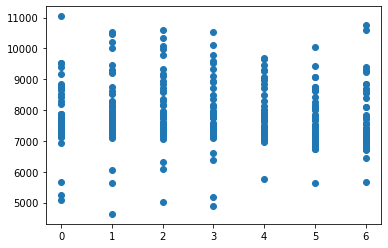

In [16]:
#Exploratory Analysis between Temperature and Power Consumption
import matplotlib.pyplot as plt

plt.scatter(df_merge['Weekday'], df_merge['Power Consumption'])
plt.show()

<AxesSubplot:>

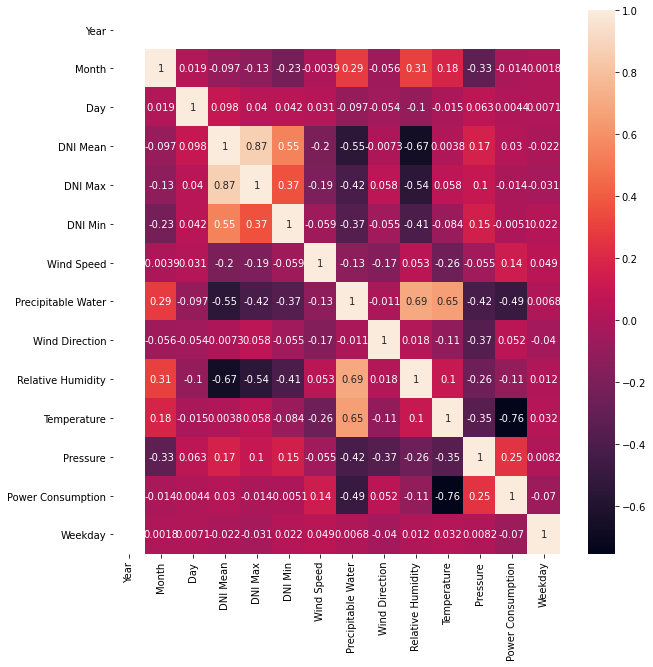

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df_merge.corr(), annot=True)

In [18]:
df_merge.to_csv('Datasets/UCF_PowerWeatherData.csv', index=False)